# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1:Alejandro Andres Velasco Santinato
*   Alumno 2:Daniela Leal Rivero
*   Alumno 3:John Briceño Diaz






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
import os
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['.git', 'modelo_mnist_tensorflow.ipynb', 'Proyecto_práctico.ipynb']


---
### 1.4. Instalar librerías necesarias

NOTA: esto es un fix para colab hay que ejecutarlo y cuando pida reiniciar el entorno se reinicia, despues de reiniciarlo simplemente ejecuten lo demas y deje esto como esta

In [ ]:
#Si estamos en Colab actualizamos tensorflow
if IN_COLAB:
  !pip uninstall tensorflow -y
  !pip install tensorflow==2.15

In [4]:
%%capture
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5

else:
  %pip install numpy==1.23.5
  %pip install matplotlib==3.10.3
  %pip install pandas==2.0.3
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.10.1
  %pip install torch==2.0.1
  %pip install agents==1.4.0

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [5]:
from PIL import Image
import numpy as np
import gym
import matplotlib.pyplot as plt
import pandas as pd
import keras
print(keras.__version__)
import tensorflow as tf

tf.keras.__version__ = keras.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy, MaxBoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint, Callback

2.10.0


In [ ]:
#Comprobando GPU
print(tf.config.experimental.list_physical_devices("GPU"))
print("Versión de TensorFlow:", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Versión de TensorFlow: 2.10.1


#### Configuración base

In [7]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 8

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [8]:
class AtariProcessor(Processor):
    """
    Clase para procesar las observaciones, estados y recompensas en entornos Atari.

    :param max_frames: Número de frames sobre los que calcular el máximo.
    :param crop_area: Área de recorte de la imagen (left, upper, right, lower).
    :param bw_threshold: Umbral para convertir la imagen a blanco y negro.
    :param output_shape: Tamaño de la imagen de salida (width, height).
    """
    
    def __init__(self, max_frames=None, crop_area=None, bw_threshold=None, output_shape=None):
        super(AtariProcessor, self).__init__()
        self.max_frames = max_frames
        self.crop_area = crop_area
        self.bw_threshold = bw_threshold
        self.output_shape = output_shape
        self.frame_buffer = []  # Buffer para almacenar los frames anteriores
        
    def process_observation(self, observation):
        """
        Procesa una observación de la pantalla del juego.

        :param observation: Array de la observación (imagen) del entorno.
        :return: Observación procesada como un array uint8.
        """
        
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)

        # Realizar el recorte
        if self.crop_area is not None:
            img = img.crop(self.crop_area)

        # Convertir a escala de grises y redimensionar si se especifica output_shape
        if self.output_shape is not None:
            img = img.resize(self.output_shape).convert('L')
        else:
            img = img.convert('L')
        
        # Umbralización para convertir a solo blanco y negro
        if self.bw_threshold is not None:
            img = img.point(lambda p: p > self.bw_threshold)
        
        processed_observation = np.array(img)
        if self.output_shape is not None:
            assert processed_observation.shape == self.output_shape
        
        if self.max_frames is not None:
            # Añadir el frame procesado al buffer
            self.frame_buffer.append(processed_observation)
            # Mantener solo los últimos max_frames frames en el buffer
            if len(self.frame_buffer) > self.max_frames:
                self.frame_buffer.pop(0)
            # Tomar el máximo entre los frames en el buffer
            max_observation = np.max(np.array(self.frame_buffer), axis=0)
        else:
            max_observation = processed_observation    
        return max_observation.astype('uint8')
        
    def process_state_batch(self, batch):
        """
        Procesa un lote de estados.

        :param batch: Lote de estados (batch).
        :return: Lote de estados procesados.
        """
        
        max_value = 255
        processed_batch = batch.astype('float32') / max_value
        return processed_batch

    def process_reward(self, reward):
        """
        Procesa la recompensa.

        :param reward: Recompensa original.
        :return: Recompensa procesada (clip -1.0 a 1.0).
        """
        
        reward = np.clip(reward, -1., 1.)
        return reward

In [9]:
class RewardLogger(Callback):
    """
    Callback para registrar las recompensas al final de cada episodio durante el test.

    :param episode_rewards: Lista para almacenar las recompensas de cada episodio.
    """
    def __init__(self):
        self.episode_rewards = []
    
    def on_episode_end(self, episode, logs={}):
        """
        Método llamado al final de cada episodio.

        :param episode: Número del episodio.
        :param logs: Diccionario de registros que contiene la recompensa del episodio.
        """
        self.episode_rewards.append(logs.get('episode_reward', 0))

In [23]:
def graph_training(env_name, ruta_name, variables=['mean_q'], x_variable='nb_steps'):
    """
    Genera y guarda gráficos de la evolución de varias variables durante el entrenamiento.

    :param env_name: Nombre del entorno.
    :param version_name: Nombre de la versión del entrenamiento.
    :param variables: Lista de variables a graficar (por defecto ['mean_q']).
    :param x_variable: Variable del eje x para todas las gráficas (por defecto 'nb_steps').
    """
    
    with open(os.path.join(ruta_name, 'dqn_{}_log.json'.format(env_name))) as f:
        data = json.load(f)

    num_vars = len(variables)
    cols = 2
    rows = (num_vars + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Convertir a lista para unificar el manejo de los subplots
    colors = plt.cm.viridis(np.linspace(0, 1, num_vars))  # Colormap para diferentes colores

    df = pd.DataFrame(data)

    for ax, variable, color in zip(axes, variables, colors):
        if x_variable in df and variable in df:
            df.plot(x=x_variable, y=variable, ax=ax, legend=False, color=color)
            ax.set_title(f"Evolución - {variable}")
            ax.set_xlabel(x_variable.capitalize())
            ax.set_ylabel(variable.capitalize())
        else:
            ax.set_title(f"Variable '{variable}' or '{x_variable}' not found in data")
            ax.set_xlabel(x_variable.capitalize())
            ax.set_ylabel(variable.capitalize())

    # Eliminar subplots vacíos si el número de variables es impar
    if num_vars % cols != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.savefig(os.path.join(ruta_name, 'dqn_{}_{}.png'.format(env_name, "_".join(variables))))
    plt.show()

In [24]:
def graph_testing(env_name, ruta_name, reward_logger):
    """
    Genera un gráfico de barras para las recompensas de cada episodio y una línea horizontal para el promedio.

    :param env_name: Nombre del entorno.
    :param version_name: Nombre de la versión del entrenamiento.
    :param reward_logger: Instancia de RewardLogger con las recompensas de los episodios.
    """
    # Verificar que haya recompensas registradas
    if not reward_logger.episode_rewards:
        print("No hay recompensas registradas en reward_logger.")
        return
    
    # Calcular el promedio de recompensas
    average_reward = sum(reward_logger.episode_rewards) / len(reward_logger.episode_rewards)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(reward_logger.episode_rewards)), reward_logger.episode_rewards, alpha=0.7, label='Recompensas por episodio')
    
    # Añadir la línea del promedio
    plt.axhline(y=average_reward, color='r', linestyle='--', label=f'Promedio ({average_reward:.2f})')
    
    # Añadir etiquetas y título
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa')
    plt.title('Recompensas por episodio y promedio')
    plt.legend()

    # Guardar gráfico
    plt.savefig(os.path.join(ruta_name, 'dqn_{}_test.png'.format(env_name)))

    # Mostrar el gráfico
    plt.show()

1. Implementación de la red neuronal

In [12]:
def build_model(input_shape, nb_actions):
    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=input_shape))
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), activation='relu'))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model

input_shape = (WINDOW_LENGTH, INPUT_SHAPE[0], INPUT_SHAPE[1])
model = build_model(input_shape, nb_actions)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 8)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        16416     
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

## 2. Implementación de la solución DQN

Hiperparámetros

In [16]:

# Estrategia
POLICY_CLASSES = {
    'EpsGreedyQPolicy': EpsGreedyQPolicy(),
    'BoltzmannQPolicy': BoltzmannQPolicy(),
    'MaxBoltzmannQPolicy': MaxBoltzmannQPolicy()
}
hp = {
    # Procesador
    'MAX_FRAMES': 3, # Cantidad de frames consecutivos para realizar el máximo. 'None' para ignorar.
    'CROP_AREA': (33, 31, 124, 195), # Medidas para recortar el frame(left, upper, right, lower). 'None' para ignorar.
    'BW_THRESHOLD': 0, # Umbral para transformar el frame a blanco y negro. 'None' para ignorar.
    # Memoria
    'MEMORY_SIZE': 1000000, # Número máximo de experiencias que la memoria puede almacenar
    # Estrategia
    'POLICY': 'MaxBoltzmannQPolicy', # Opciones: EpsGreedyQPolicy, BoltzmannQPolicy, MaxBoltzmannQPolicy
    'EPS_MIN': 0.1, # Valor final de 'eps' (mínima exploración)
    'EPS_MAX': 0.5, # Valor inicial de 'eps' (máxima exploración)
    'EPS_TEST': 0.05, # Valor de 'eps' que se usará durante las pruebas
    'EPS_STEPS': 1000000, # Pasos entre EPS_MAX y EPS_MIN
    # Agente
    'STEPS_WARMUP': 50000, # Número de pasos antes de que el agente comience a entrenar
    'GAMMA': 0.99, # Factor de descuento de las recompensas futuras
    'TARGET_MODEL_UPDATE': 10000, # La frecuencia (en pasos) de actualización del modelo objetivo
    'TRAIN_INTERVAL': 8, # Cuántos pasos de interacción con el entorno se deben realizar antes de que el agente actualice sus pesos de red
    'DELTA_CLIP': 1, # Valor límite que se utiliza para recortar (limitar) las diferencias temporales que se usan para actualizar los pesos de la red
    'BATCH_SIZE': 64, # Cantidad de muestras que tomará de la memaria para realizar el entrenamiento
    # Entrenamiento
    'VISUALIZE_TRAINING': False, # Visualizar juego durante el entrenamiento
    'LEARNING_RATE': 0.00025, # Tasa de aprendizaje
    'CHECKPOINT_INTERVAL': 250000, #250000, # Intervalo de pasos después del cual se registrará el checkpoint
    'FILELOGGER_INTERVAL': 5000, # Intervalo de pasos después del cual se escribirá la información en el archivo
    'TRAINING_STEPS': 2000000, # Número total de pasos de entrenamiento
    'LOG_INTERVAL': 10000 # Intervalo de pasos en el que se registrará el progreso del entrenamiento
}

In [17]:
from tensorflow.keras.optimizers.legacy import Adam
memory = SequentialMemory(limit=hp['MEMORY_SIZE'], window_length=WINDOW_LENGTH)

# Creando la policy
policy = LinearAnnealedPolicy(POLICY_CLASSES[hp['POLICY']], attr='eps', value_max=hp['EPS_MAX'], 
                              value_min=hp['EPS_MIN'], value_test=hp['EPS_TEST'], nb_steps=hp['EPS_STEPS'])

#Creando el AtariProcessor con los filtros
processor = AtariProcessor(max_frames=hp['MAX_FRAMES'], 
                           crop_area=hp['CROP_AREA'], 
                           bw_threshold=hp['BW_THRESHOLD'],
                           output_shape=INPUT_SHAPE)

# Creando el agente de DQN
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=processor, nb_steps_warmup=hp['STEPS_WARMUP'], gamma=hp['GAMMA'], 
               target_model_update=hp['TARGET_MODEL_UPDATE'], train_interval=hp['TRAIN_INTERVAL'], 
               delta_clip=hp['DELTA_CLIP'], batch_size=hp['BATCH_SIZE'])

# Compilando el agente
dqn.compile(Adam(learning_rate=hp['LEARNING_RATE']), metrics=['mae'])

In [18]:
# --- Parte de Entrenamiento con Checkpoints  ---

# Define el directorio para los checkpoints dentro de la carpeta drive_root
checkpoint_dir = os.path.join(drive_root, 'checkpoints')
# Crea el directorio si no existe (exist_ok=True evita errores si ya existe)
os.makedirs(checkpoint_dir, exist_ok=True)

# Define el nombre de archivo para guardar los pesos, incluyendo la ruta a tu carpeta de Drive o Local
# {step} será reemplazado automáticamente por el número de pasos realizados durante el entrenamiento
checkpoint_weights_filename = os.path.join(checkpoint_dir, 'dqn_' + env_name + '_weights_{step}.h5f')

# Define los callbacks para guardar los pesos y registrar el progreso
# ModelIntervalCheckpoint guarda los pesos en intervalos especificados
# FileLogger registra el progreso del entrenamiento en un archivo JSON
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=hp['CHECKPOINT_INTERVAL'])]
callbacks += [FileLogger(os.path.join(drive_root, 'dqn_{}_log.json'.format(env_name)), interval=hp['FILELOGGER_INTERVAL'])]


# --- Iniciar Entrenamiento ---
print("\nIniciando el entrenamiento de DQN...")
final_weights_filename = os.path.join(drive_root, 'dqn_{}_final_weights.h5f'.format(env_name))
if os.path.exists(final_weights_filename + '.data-00000-of-00001'):
    dqn.load_weights(final_weights_filename) # Carga los pesos finales guardados anteriormente
    print('Pesos cargados correctamente.')
else:
    print('No se encontraron pesos para cargar.')
    
dqn.fit(env, callbacks=callbacks, nb_steps=hp['TRAINING_STEPS'], log_interval=hp['LOG_INTERVAL'], 
        visualize=hp['VISUALIZE_TRAINING'], verbose=2)

# Después de entrenar, guarda los pesos finales
final_weights_filename = os.path.join(drive_root, 'dqn_{}_final_weights.h5f'.format(env_name))
#cargar pesos finales
dqn.save_weights(final_weights_filename, overwrite=True)
print(f"\nEntrenamiento finalizado. Pesos finales guardados en: {final_weights_filename}")


Iniciando el entrenamiento de DQN...
Pesos cargados correctamente.
Training for 2000000 steps ...


c:\Users\john-\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


     526/2000000: episode: 1, duration: 3.538s, episode steps: 526, steps per second: 149, episode reward: 12.000, mean reward:  0.023 [ 0.000,  1.000], mean action: 3.259 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    1141/2000000: episode: 2, duration: 4.395s, episode steps: 615, steps per second: 140, episode reward: 11.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 3.244 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    1915/2000000: episode: 3, duration: 5.431s, episode steps: 774, steps per second: 143, episode reward: 17.000, mean reward:  0.022 [ 0.000,  1.000], mean action: 3.341 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    2560/2000000: episode: 4, duration: 4.524s, episode steps: 645, steps per second: 143, episode reward: 13.000, mean reward:  0.020 [ 0.000,  1.000], mean action: 3.174 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    3280/2000000: episode: 5, duration: 5.072s, episode steps: 720, 

c:\Users\john-\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   50840/2000000: episode: 70, duration: 47.534s, episode steps: 842, steps per second:  18, episode reward: 12.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.502 [0.000, 5.000],  loss: 0.010786, mae: 1.274583, mean_q: 1.533066, mean_eps: 0.479832
   51584/2000000: episode: 71, duration: 42.037s, episode steps: 744, steps per second:  18, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.870 [0.000, 5.000],  loss: 0.012109, mae: 1.275734, mean_q: 1.531250, mean_eps: 0.479517
   52252/2000000: episode: 72, duration: 37.723s, episode steps: 668, steps per second:  18, episode reward: 14.000, mean reward:  0.021 [ 0.000,  1.000], mean action: 2.382 [0.000, 5.000],  loss: 0.011033, mae: 1.276791, mean_q: 1.533858, mean_eps: 0.479234
   53077/2000000: episode: 73, duration: 46.219s, episode steps: 825, steps per second:  18, episode reward: 12.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.445 [0.000, 5.000],  loss: 0.011171, mae: 1.277939, m

Testeo de la implementación

In [35]:
# --- Parte de prueba para calcular la recompensa media (después del entrenamiento) ---
print("\nIniciando la fase de prueba...")
# Carga los pesos finales para la prueba (o un checkpoint específico si quieres probar un modelo intermedio)
dqn.load_weights(final_weights_filename) # Carga los pesos finales guardados anteriormente
reward_logger = RewardLogger()
dqn.test(env, nb_episodes=10, visualize=False, callbacks=[reward_logger])

# Calcular el promedio de recompensas
average_reward = sum(reward_logger.episode_rewards) / len(reward_logger.episode_rewards)
print(f"Recompensa promedio en 10 episodios: {average_reward}")


Iniciando la fase de prueba...
Testing for 10 episodes ...
Episode 1: reward: 7.000, steps: 520
Episode 2: reward: 11.000, steps: 718
Episode 3: reward: 15.000, steps: 791
Episode 4: reward: 14.000, steps: 823
Episode 5: reward: 6.000, steps: 495
Episode 6: reward: 12.000, steps: 734
Episode 7: reward: 6.000, steps: 402
Episode 8: reward: 19.000, steps: 1390
Episode 9: reward: 11.000, steps: 688
Episode 10: reward: 9.000, steps: 530
Recompensa promedio en 10 episodios: 11.0


# 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---

## Parámetros Seleccionados

### Red Neuronal (CNN_ARGS y MLP_ARGS):

 - **Filtros y dimensiones de los filtros (32, 64 y 64 con dimensiones (8, 8), (4,4) y (2,2)):** Las dimensiones y el número de filtros son seleccionados para captar características espaciales importantes del entorno visual, manteniendo un balance entre capacidad de aprendizaje y eficiencia computacional. Filtros más grandes y más numerosos podrían mejorar el aprendizaje pero a costa de mayor complejidad y tiempo de entrenamiento. 
  
 - **Activación ReLU:** La activación ReLU introduce no linealidad en la red, lo que permite al modelo aprender y representar relaciones complejas en los datos. Es computacionalmente eficiente y ayuda a mitigar el problema del gradiente desvaneciente.
  
 - **Max Pooling en la segunda capa:** El max pooling reduce la dimensionalidad de la representación, conservando las características más relevantes y reduciendo el riesgo de sobreajuste. Esto es crítico para mantener la eficiencia y generalización del modelo.

### Procesador

Con el preprocesamiento de las observaciones se buscaron conseguir dos objetivos: resolver el problema del parpadeo y simplificar los estados.

**Parpadeo**

En los juegos de Atari se produce una efecto de parpadeo que provoca que ciertos elementos desaparezca momentáneamente de la pantalla y vuelvan a aparecer. Si bien este efecto apenas es detectado por el ojo humano, para el entrenamiento de nuestro agente puede llegar a ser un problema. 
Para mitigar este efecto se realizó un preprocesamiento que calcula el máximo de los últimos MAX_FRAMES (3) consecutivos. De esta forma si el jugador, un disparo o cualquier otro elemento desaparece de la pantalla se mantiene visible durante esa ventana de frames [1].

**Simplificación**

Para reducir el espacio de estados posibles se buscó simplificar al máximo las observaciones tomadas del entorno. De esa forma acotamos la necesidad de exploración por parte del agente. Además al tener imágenes más simples es más fácil entrenar a la red neuronal. Para ello se realizaron las siguientes tareas:

- **Color:** Se pasó la imagen a blanco y negro para simplificar el entrenamiento de la red.
- **Recorte:** Se recortó la imagen hacia los lados dejando solo la porción de la imagen donde el jugador se mueve, hacia arriba se recortó la puntuación, y hacia abajo se recorto la imagen que no agrega ninguna información sobre el juego. Quedando el area: (33, 31, 124, 195). Haciendo esto perdemos la posibilidad de entrenar al modelo para dispararle a la nave que pasa periódicamente pero, al estar limitadas las recompensas a 1, no es una pérdida significativa.
- **Redimensión:** Se redimensionó la imagen a INPUT_SHAPE (84x84) [2]. De esta forma tenemos una imagen con menos cantidad de píxeles y al estirarla de forma horizontal hace que los disparos sean más notables.

### Memoria

- **MEMORY_SIZE (1,000,000):** Un tamaño grande de memoria asegura que el agente pueda almacenar una gran cantidad de experiencias, lo cual es esencial para aprender de una amplia variedad de situaciones y mejorar la política de decisión basada en experiencias pasadas. Pero por otro lado buscamos que la memoria no sea más que 50% de todos los pasos de entrenamiento. De esta forma nos aseguramos que cuando el entrenamiento ya se encuentra avanzado no utilice experiencias demasiado antiguas.
- **WINDOW_LENGTH (8):** Aumentamos la cantidad de frames que apilamos en la entrada de la red neuronal, debido al preprocesamiento que realizamos para mitigar el parpadeo. Al realizar el máximo entre MAX_FRAMES (3) frames consecutivos perdemos algo de información temporal que compensamos tomando WINDOW_LENGTH (8) frames como entrada de nuestro modelo.

### Estrategia

- **POLICY (MaxBoltzmannQPolicy):** La política MaxBoltzmannQPolicy balancea exploración y explotación, es una política que selecciona acciones probabilísticas en funcion de los valores Q(s,a) estimados por la red neuronal. Usa una distribucón softmax para asignar probabilidad a cada acción, de modo que las acciones con valores Q altos sean más probables, pero sin excluir las otras.

- **LinearAnnealedPolicy:** Utilizamos una función lineal para ir decreciendo el grado de exploración (epsilon).
  
- **EPS_MIN (0.1) y EPS_MAX (1.0):** Comenzar con una alta tasa de exploración (EPS_MAX) a 1 hace que al principio explore mas apliamente y disminuirla gradualmente a 0.1 (EPS_MIN) permite luego concentrarse en explotar las mejores estrategias aprendidas. Se mantuvo un EPS_MIN de 0.1 durante el resto del entrenamiento para evitar sobreajustes.
  
- **EPS_STEPS (1,000,000):** Disminuir epsilon a lo largo de un millón de pasos proporciona una transición suave de exploración a explotación, ayudando al agente a evitar el estancamiento en subóptimos locales. Utilizando este valor mantenemos un fase de exploración durante el primer tercio del entrenamiento y nos enfocamos en realizar una explotación durante el resto. Además este valor está alineado con MEMORY_SIZE (1,000,000) de tal forma que inicialmente cargamos en la memoria toda la experiencia acumulada durante nuestra fase de exploración para luego ir refinando la experiencia en nuestra fase de explotación.

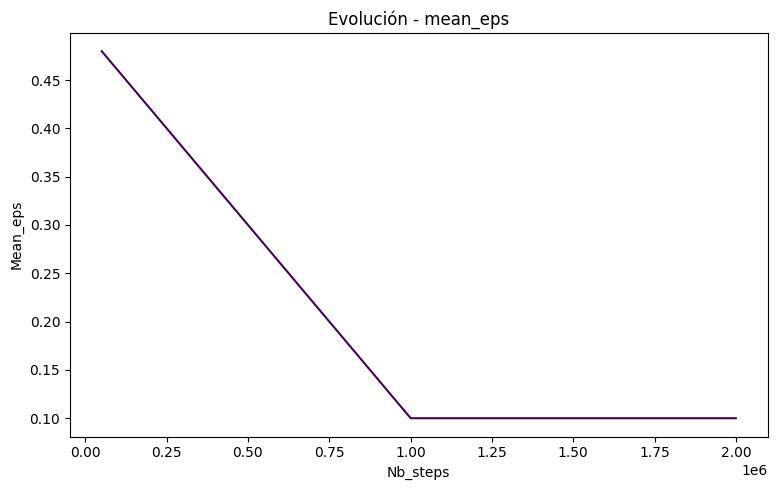

In [26]:
import json
graph_training(env_name, drive_root, variables=['mean_eps'])

### Parámetros del Agente

- **STEPS_WARMUP (50,000):** Un periodo de calentamiento de 50,000 pasos permite al agente acumular suficiente experiencia inicial antes de comenzar el entrenamiento, mejorando la estabilidad del proceso de aprendizaje.
  
- **GAMMA (0.99):** Un factor de descuento alto (0.99) asegura que el agente valore más las recompensas futuras, incentivando políticas que maximicen la recompensa a largo plazo. Da la dinámica del juego es posible que durante varios steps no consiga ningún puntaje y, por otro lado, si dejamos que se concentre mucho en las recompensas inmediatas tome decisiones arriegadas que le hagan perder vidas.
  
- **TARGET_MODEL_UPDATE (10,000):** Actualizar el modelo objetivo cada 10,000 pasos proporciona estabilidad en el entrenamiento, evitando oscilaciones bruscas y mejorando la convergencia del modelo.
  
- **TRAIN_INTERVAL (8):** Este valor mantiene coherencia con al valor de WINDOW_LENGTH (8) que estamos utilizando.
  
- **DELTA_CLIP (1.0):** Clipping de las diferencias temporales a 1.0 previene grandes actualizaciones de los pesos, lo cual mejora la estabilidad del entrenamiento.
  
- **BATCH_SIZE (64):** Un tamaño de batch de 64 proporciona un buen equilibrio entre la eficiencia computacional y la estabilidad del gradiente durante el entrenamiento.

### Entrenamiento

- **VISUALIZE_TRAINING (False):** Desactivar la visualización durante el entrenamiento ahorra recursos computacionales y tiempo.
  
- **LEARNING_RATE (0.00025):** Una tasa de aprendizaje baja (0.00025) asegura que el modelo aprenda de manera gradual y estable, evitando grandes saltos que podrían desestabilizar el entrenamiento.
  
- **CHECKPOINT_INTERVAL (250,000):** Guardar checkpoints cada 250,000 pasos permite recuperar el entrenamiento en caso de fallos y evaluar el progreso a intervalos razonables.
  
- **FILELOGGER_INTERVAL (5,000):** Registrar los logs cada 5,000 pasos proporciona suficiente detalle para monitorear el progreso del entrenamiento sin generar excesivos datos.
  
- **TRAINING_STEPS (2,000,000):** Un número alto de pasos de entrenamiento (2,000,000) asegura que el agente tenga suficiente tiempo para aprender y refinar su política en el complejo entorno de Space Invaders, ademas se fue atilizando los anteriores pesos para una mejor entrenaimeto del modelo.
  
- **LOG_INTERVAL (10,000):** Registrar el progreso cada 10,000 pasos proporciona una buena resolución para evaluar el rendimiento del agente a lo largo del tiempo.

## Resultados Obtenidos

En nuestras primeras pruebas nuestro agente pudo obtener una puntuación cercana a los 20.0, en este caso tras cambiar la policy a MaxBoltzmannQPolicy hace que nuestro agente aprenda mas escalonadamente, debido a que aplica que aplica una politica estocástica basada en una versión suavizada del gredy policy. Esto hace que nuestro agente no caiga en minimos locales y pueda seguir aprendiendo durante todo el entrenamiento.

La implementación del algoritmo DQN con los parámetros seleccionados ha demostrado ser efectiva para el juego Space Invaders, logrando resultados previamente inalcanzables con otras configuraciones.

Esta gráfica muestra las recompensas obtenidas en el Test de muestra de 10, con una línea roja que indica la recompensa promedio.  
La recompensa promedio es de 23.0.

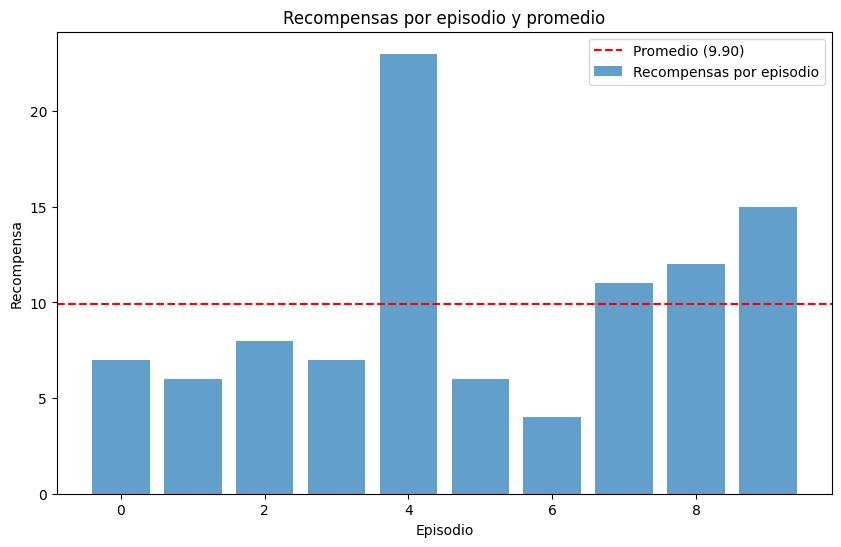

In [27]:
graph_testing(env_name, drive_root, reward_logger)

## Estudio del entrenamiento

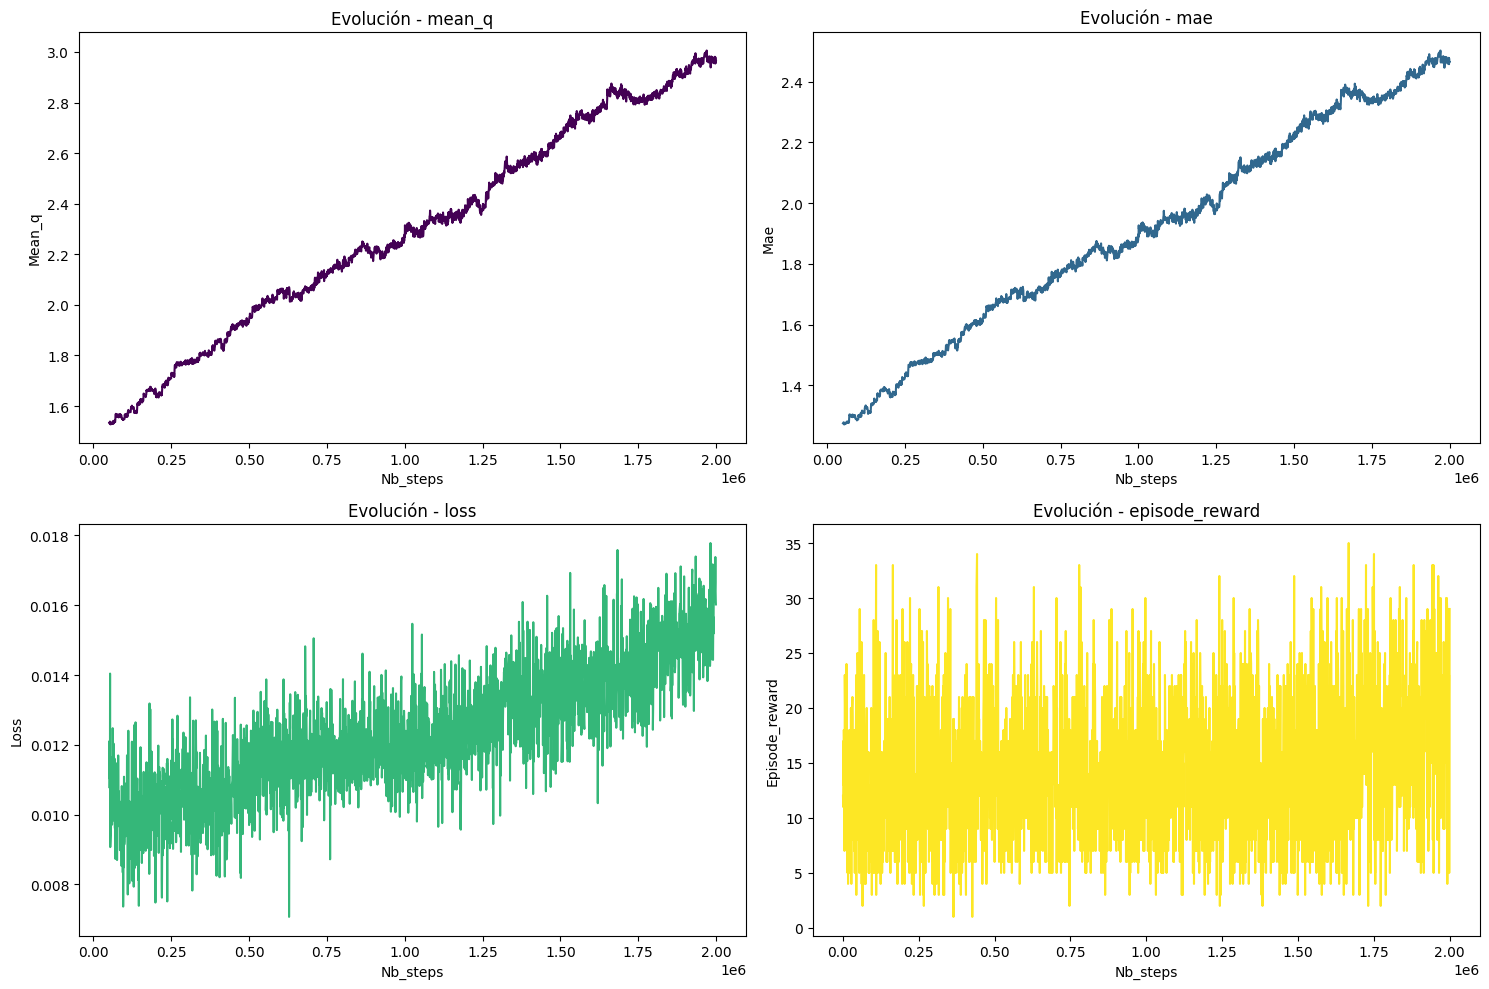

In [28]:
graph_training(env_name, drive_root, variables=['mean_q', 'mae','loss', 'episode_reward'])